In [6]:
import pandas as pd
import math

In [2]:
with open('data/obj_pose-laser-radar-synthetic-input.txt') as f:
    radar = [l for l in f.readlines() if l.startswith('R')]

In [3]:
import io 
buffer = io.StringIO()
for l in radar: 
    buffer.write(l + "\n")
buffer.seek(0)

headers = [
    'sensor_type', 'rho_measured',
    'phi_measured', 'rhodot_measured', 
    'timestamp', 'x_groundtruth', 
    'y_groundtruth', 'vx_groundtruth', 
    'vy_groundtruth', 'yaw_groundtruth', 'yawrate_groundtruth']

data = pd.read_csv(buffer, sep="\t", header=None)
data = data.rename(columns=lambda i: headers[int(i)])

In [4]:
data.head()

,sensor_type,rho_measured,phi_measured,rhodot_measured,timestamp,x_groundtruth,y_groundtruth,vx_groundtruth,vy_groundtruth,yaw_groundtruth,yawrate_groundtruth
0,R,1.014892,0.554329,4.892807,1477010443050000,0.859997,0.600045,5.199747,0.001797,0.000346,0.013822
1,R,1.047505,0.389240,4.511325,1477010443150000,1.379955,0.600629,5.198979,0.010778,0.002073,0.027634
2,R,1.698300,0.298280,5.209986,1477010443250000,1.899823,0.602470,5.197661,0.026932,0.005182,0.041430
3,R,2.044382,0.276002,5.043867,1477010443350000,2.419540,0.606284,5.195728,0.050239,0.009669,0.055199
4,R,2.990916,0.217668,5.191807,1477010443450000,2.939043,0.612786,5.193090,0.080668,0.015532,0.068933


In [ ]:
x = data.loc[0]['x_groundtruth']
y = data.loc[0]['y_groundtruth']

In [27]:
def calc_phi(row):
    x, y = row['x_groundtruth'], row['y_groundtruth']
    return math.atan2(y, x)

data['phi_calc'] = data.apply(calc_phi, axis=1)

In [ ]:
math.atan2(100, 0) - math.pi / 2

In [ ]:
math.pi

In [ ]:
data[['x_groundtruth', 'y_groundtruth']].describe()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

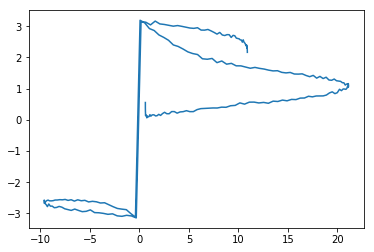

In [19]:
plt.plot(data['y_groundtruth'], data['phi_measured'])

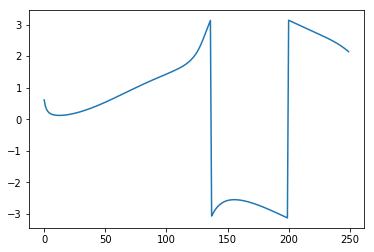

In [30]:
plt.plot(data['phi_calc'])

In [33]:
import numpy as np

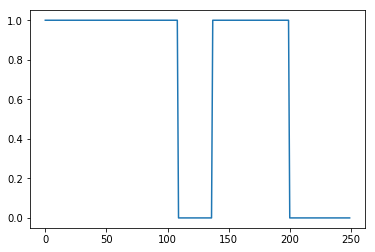

In [36]:
plt.plot(np.tan(data['phi_calc']) > 0)

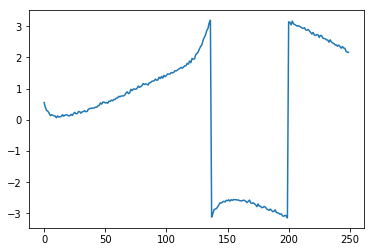

In [38]:
plt.plot(data['phi_measured'])